In [ ]:
import polars as pl
from cstbioinfo.immune.utils import get_oas

df = get_oas(
    "https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Bashford_2013/csv/ERR220401_Heavy_Bulk.csv.gz"
)

In [2]:
v_calls = df.get_column("v_call").unique()
df = df.filter(pl.col("v_call") == v_calls[0])
df.shape

(8, 112)

In [ ]:
from cstbioinfo.msa import distance_matrix

dist_matrix = distance_matrix(
    df.get_column("sequence_alignment_aa"), align=True, normalize=False
)


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 7.5 mm


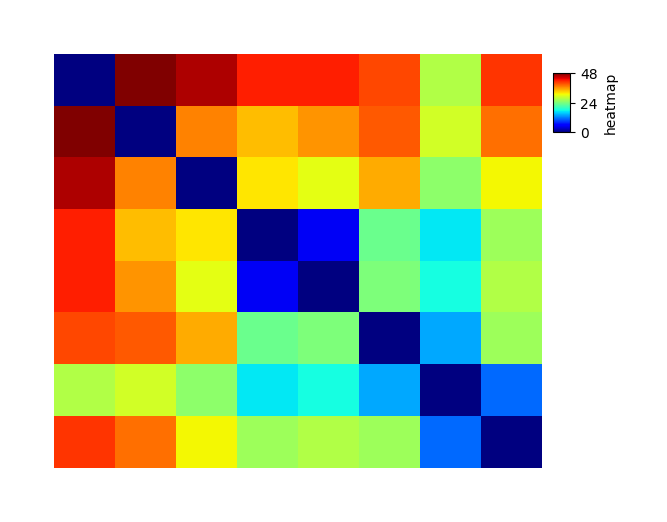

In [ ]:
import PyComplexHeatmap as pch
import pandas as pd

df_dist = pd.DataFrame(dist_matrix)

pch.ClusterMapPlotter(df_dist)

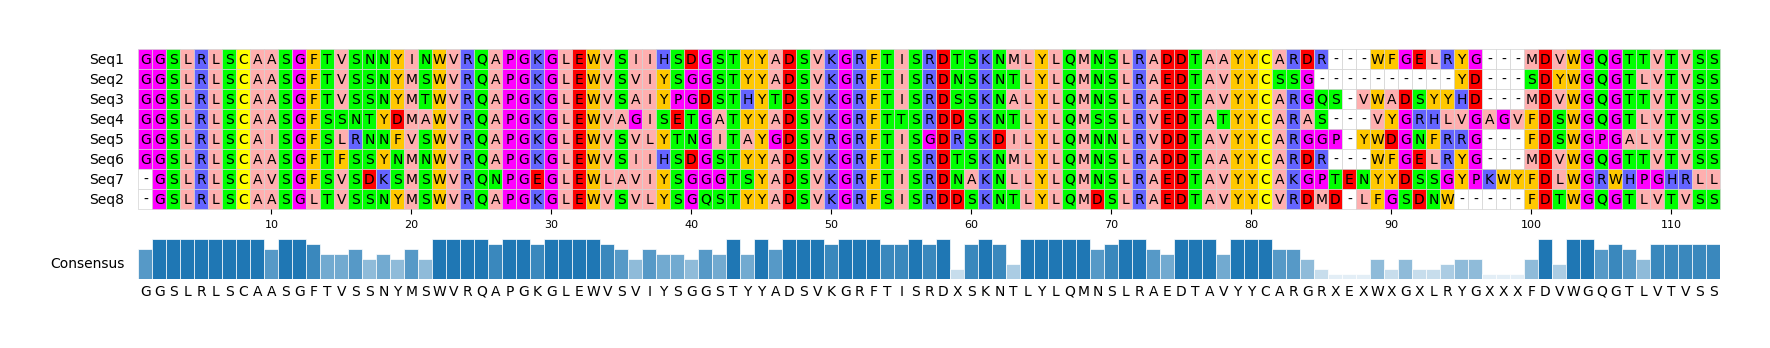

In [ ]:
from cstbioinfo.msa import plot_msa

aa_sequenes = df.get_column("sequence_alignment_aa").to_list()
sequence_ids = [f"Seq{i + 1}" for i in range(len(aa_sequenes))]

# Create visualization
mv = plot_msa(
    aa_sequenes,
    seq_ids=sequence_ids,
    title="Protein Sequence Alignment",
    wrap_length=250,
    show_grid=True,
    show_consensus=True,
)

# Display the plot properly (semicolon suppresses output)
mv.plotfig();